In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, '..//')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from e2slib.utillib import dummy_data, functions
from src.data import manipulations, viz_schema, standard_data_process as sdp, data_preparation as dp
from e2slib.structures import enums, datetime_schema
from datetime import datetime
from src.visualization import visualize, viz_types
from pathlib import Path



### Data for testing features

In [3]:
demand = dummy_data.create_dummy_site_demand(2022)
carbon = dummy_data.generate_dummy_carbon_profile(2022)
price = dummy_data.generate_dummy_price_profile(2022)

demand_2 = dummy_data.create_dummy_site_demand(2021)

demand_two = pd.concat([demand_2, demand], axis=0)

save_path = Path(r'/Users/rhysjones/Library/CloudStorage/GoogleDrive-rhys.jones@e2s.energy/Shared drives/e2s-softwares/Lyra/08 - Customers/06 - Bender/02 - Ressources/03 - Test data (EVs + Chargers)/submeter_data.csv')
bender_submeters = pd.read_csv(save_path, index_col=0, parse_dates=True)

data = {'A': [10, 15, 12, 14, 20, 8, 11, 13, 16, 5, 1000, 10, 15, 12, 14, 20, 8, 11, 13, 16, 5, 1000, 10, 15, 12, 14, 20, 8, 11, 13, 16, 5, 1000, 20, 8, 11, 13, 16, 5, 1000, 10, 15, 12, 14, 20, 8, 11, 13, 16, 5, 1000],
        'B': [50, 55, 52, 54, 60, 48, 51, 53, 56, 45, 2000, 50, 55, 52, 54, 60, 48, 51, 53, 56, 45, 2000, 50, 55, 52, 54, 60, 48, 51, 53, 56, 45, 2000, 60, 48, 51, 53, 56, 45, 2000, 50, 55, 52, 54, 60, 48, 51, 53, 56, 45, 2000],
        'C': [100, 150, 120, 140, 200, 80, 110, 130, 160, 50, 300, 100, 150, 120, 140, 200, 80, 110, 130, 160, 50, 300, 100, 150, 120, 140, 200, 80, 110, 130, 160, 50, 300, 200, 80, 110, 130, 160, 50, 300, 100, 150, 120, 140, 200, 80, 110, 130, 160, 50, 300]}

df = pd.DataFrame(data)

# Add outliers
df.loc[3, 'A'] = 500
df.loc[6, 'B'] = 3000
df.loc[9, 'C'] = 5000

demand_array = np.array(df)


In [4]:
df_1 = functions.add_time_features(demand)

In [5]:
df_1 = manipulations.create_seasonal_average_week(enums.Season.SUMMER, df_1)

In [6]:
import plotly.express as px

# df = px.data.gapminder().query("country=='Canada'")
df_1 = manipulations.EquationManipulator().data_formatter(df_1, 'Site energy [kWh]', '* 2', 'Site power [kW]')

fig = px.bar(df_1, y=["Site energy [kWh]"], title='Site demand for a week', color=df_1.index) #, color=df.index
fig.show()


### Work with RVP

In [7]:
pd.infer_freq(demand.index)

'30T'

In [8]:
test_list = [dp.OutlierRemover().data_cleaner, dp.FillMissingData().data_cleaner]

In [13]:
test = sdp.DataPrep(bender_submeters,
                    dp.check_dataset,
                    test_list)


,DB_11,DB_3,DB_4,DB_5,DB_6,DB_9,DB_10,DB_12
Count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
Mean,4.197614,0.833613,0.682970,0.640112,0.225324,1.463343,0.820420,0.886015
StD,4.335921,0.379993,1.065927,0.078980,0.537946,1.049702,0.762795,1.426734
Min,0.238472,0.430443,0.035838,0.453167,0.000000,1.028566,0.364034,0.039552
1%,0.313950,0.475305,0.036824,0.498025,0.010134,1.041814,0.384565,0.040023
25%,0.793048,0.613206,0.038633,0.580715,0.024653,1.188752,0.422485,0.046133
50%,2.450148,0.682368,0.040107,0.668872,0.025688,1.230843,0.493701,0.050163
75%,6.212515,0.885478,1.018641,0.686295,0.028907,1.275557,0.702320,0.898992
99%,17.665151,2.259092,3.377291,0.858160,2.359133,7.174533,3.867978,4.021694
Max,29.391042,4.515401,3.908429,1.098172,3.883421,8.830542,6.867927,4.393893


No data preparation functions provided. Data will not be cleaned. The data check is as follows:
{'outliers': True, 'nan values': False, 'timeseries': True}


In [10]:
test.described_raw_data

,DB_11,DB_3,DB_4,DB_5,DB_6,DB_9,DB_10,DB_12
Count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
Mean,4.197614,0.833613,0.682970,0.640112,0.225324,1.463343,0.820420,0.886015
StD,4.335921,0.379993,1.065927,0.078980,0.537946,1.049702,0.762795,1.426734
Min,0.238472,0.430443,0.035838,0.453167,0.000000,1.028566,0.364034,0.039552
1%,0.313950,0.475305,0.036824,0.498025,0.010134,1.041814,0.384565,0.040023
25%,0.793048,0.613206,0.038633,0.580715,0.024653,1.188752,0.422485,0.046133
50%,2.450148,0.682368,0.040107,0.668872,0.025688,1.230843,0.493701,0.050163
75%,6.212515,0.885478,1.018641,0.686295,0.028907,1.275557,0.702320,0.898992
99%,17.665151,2.259092,3.377291,0.858160,2.359133,7.174533,3.867978,4.021694
Max,29.391042,4.515401,3.908429,1.098172,3.883421,8.830542,6.867927,4.393893


In [11]:
test._data.isna().sum()

DB_11    0
DB_3     0
DB_4     0
DB_5     0
DB_6     0
DB_9     0
DB_10    0
DB_12    0
dtype: int64

In [12]:
test.described_clean_data

,DB_11,DB_3,DB_4,DB_5,DB_6,DB_9,DB_10,DB_12
Count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
Mean,4.197614,0.833613,0.682970,0.640112,0.225324,1.463343,0.820420,0.886015
StD,4.335921,0.379993,1.065927,0.078980,0.537946,1.049702,0.762795,1.426734
Min,0.238472,0.430443,0.035838,0.453167,0.000000,1.028566,0.364034,0.039552
1%,0.313950,0.475305,0.036824,0.498025,0.010134,1.041814,0.384565,0.040023
25%,0.793048,0.613206,0.038633,0.580715,0.024653,1.188752,0.422485,0.046133
50%,2.450148,0.682368,0.040107,0.668872,0.025688,1.230843,0.493701,0.050163
75%,6.212515,0.885478,1.018641,0.686295,0.028907,1.275557,0.702320,0.898992
99%,17.665151,2.259092,3.377291,0.858160,2.359133,7.174533,3.867978,4.021694
Max,29.391042,4.515401,3.908429,1.098172,3.883421,8.830542,6.867927,4.393893


# Manipulators

### Resampler

In [163]:
# resampled_data = manipulations.ResampleManipulator().data_formatter(addDatetime, 'M', 'sum')
# resampled_data.head()

### Groupby

Np.array version not working properly

In [164]:
demand_with_time = functions.add_time_features(demand)

In [165]:
manipulations.GroupbyManipulator().data_formatter(demand_with_time, groupby=['Weekday flag'], agg='mean', target='Site energy [kWh]')

,Site energy [kWh]
Weekday flag,
weekday,14.620032
weekend,4.915476


### Apply equation

In [166]:
equationed_df = manipulations.EquationManipulator().data_formatter(demand_with_time, 'Site energy [kWh]', '* 8', 'A*8')
equationed_df.head()

,Site energy [kWh],Hour,Day of week,Day of year,Month,Year,Weekday flag,Half-hour,Date,Week,season,season_number,A*8
2022-01-01 00:00:00+00:00,8,0,5,1,1,2022,weekend,0,2022-01-01,52,WINTER,1,64
2022-01-01 00:30:00+00:00,0,0,5,1,1,2022,weekend,1,2022-01-01,52,WINTER,1,0
2022-01-01 01:00:00+00:00,3,1,5,1,1,2022,weekend,2,2022-01-01,52,WINTER,1,24
2022-01-01 01:30:00+00:00,9,1,5,1,1,2022,weekend,3,2022-01-01,52,WINTER,1,72
2022-01-01 02:00:00+00:00,7,2,5,1,1,2022,weekend,4,2022-01-01,52,WINTER,1,56


### Seasonal Week extractor

Only currently works on 30 minute interval data due to hard coding. This is because if we are trying to plot one weeks data it needs to be a complete week otherwise the plots won't look right.

In [167]:
new_test_arr_to_df = manipulations.get_seasonal_week(demand)
winter_week_demand = demand.loc[demand.index.isin(new_test_arr_to_df[0].index)]
spring_week_demand = demand.loc[demand.index.isin(new_test_arr_to_df[1].index)]
summer_week_demand = demand.loc[demand.index.isin(new_test_arr_to_df[2].index)]
autumn_week_demand = demand.loc[demand.index.isin(new_test_arr_to_df[3].index)]

# Plotting
### Annual plot

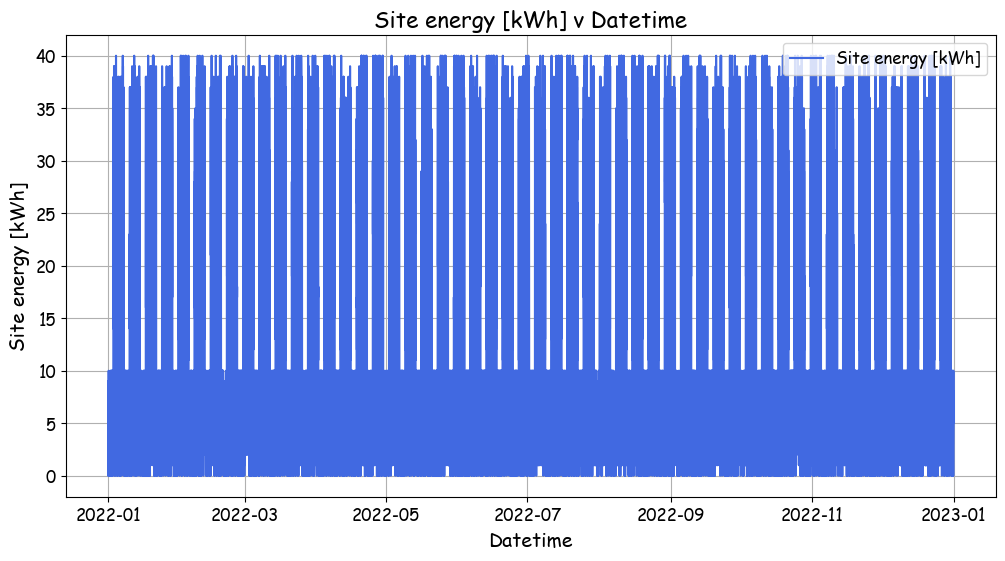

In [168]:
visualize.Visualizer(demand, viz_type=viz_types.StandardPlot()).plot_plt()

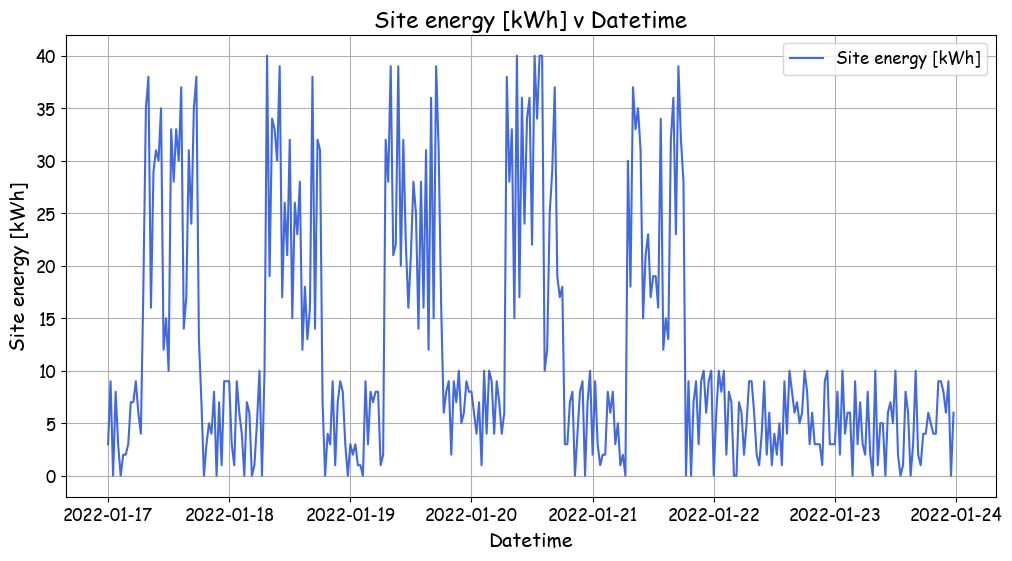

In [169]:
visualize.Visualizer(winter_week_demand, viz_type=viz_types.StandardPlot()).plot_plt()

### Power Energy

In [170]:
winter_week_demand_p_e = manipulations.EquationManipulator().data_formatter(winter_week_demand, 'Site energy [kWh]', '* 2', 'Site power [kW]')

In [171]:
winter_week_arr = np.array(winter_week_demand_p_e)

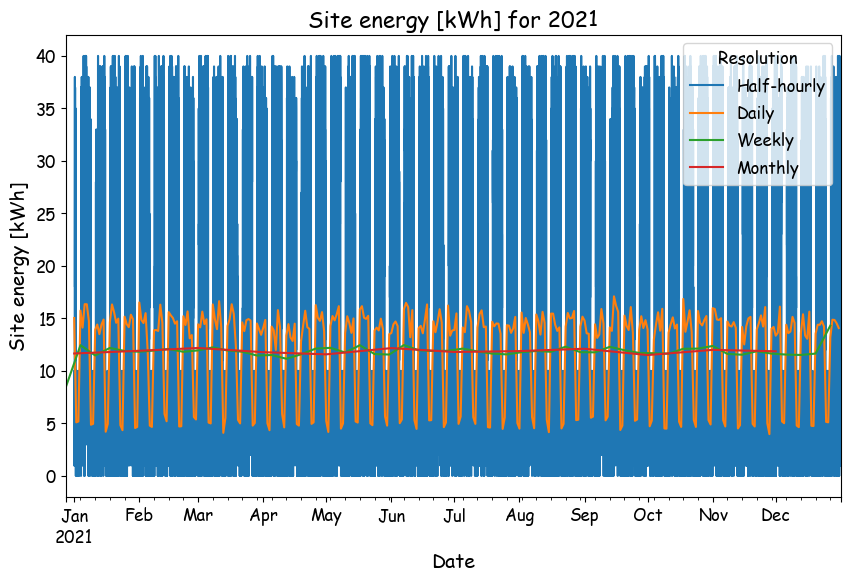

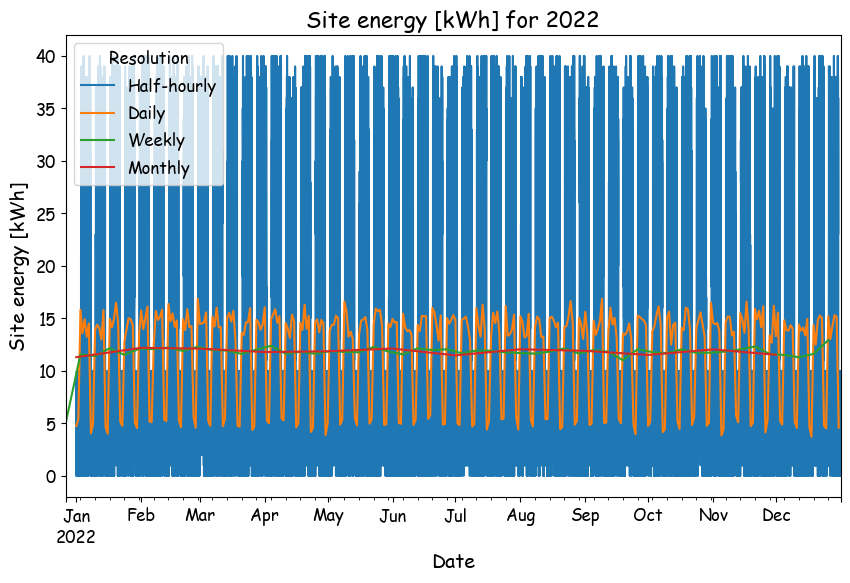

In [172]:
visualize.Visualizer(demand_two, viz_type=viz_types.AnnualPlot()).plot_plt()

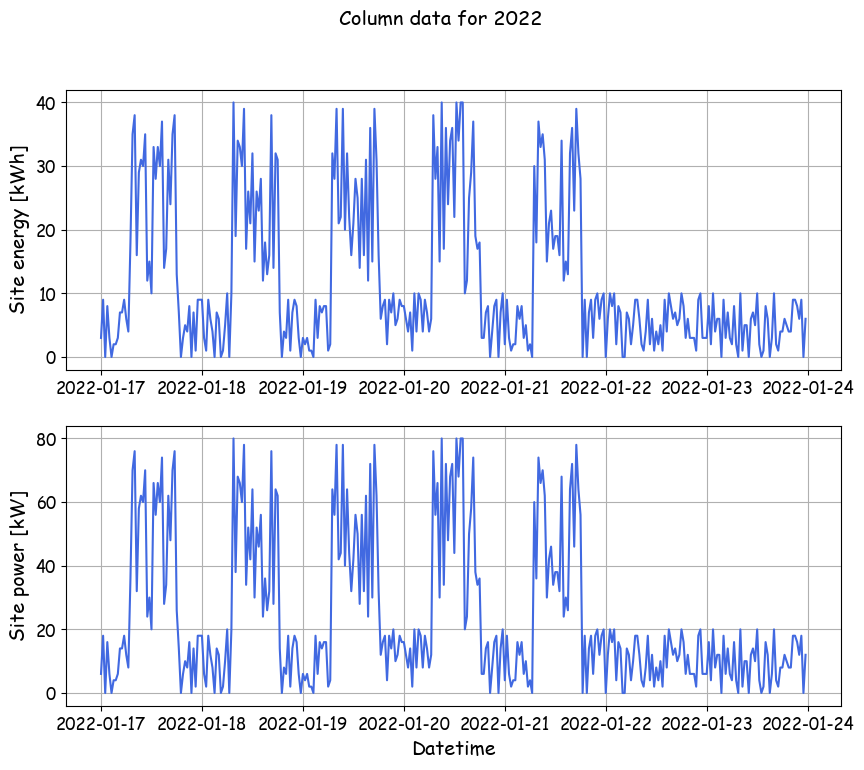

In [173]:
visualize.Visualizer(winter_week_demand_p_e, viz_type=viz_types.SubplotPlot()).plot_plt()

In [174]:
new_test_arr_to_df = manipulations.get_seasonal_week(bender_submeters)
bender_winter_week_demand = bender_submeters.loc[bender_submeters.index.isin(new_test_arr_to_df[0].index)]

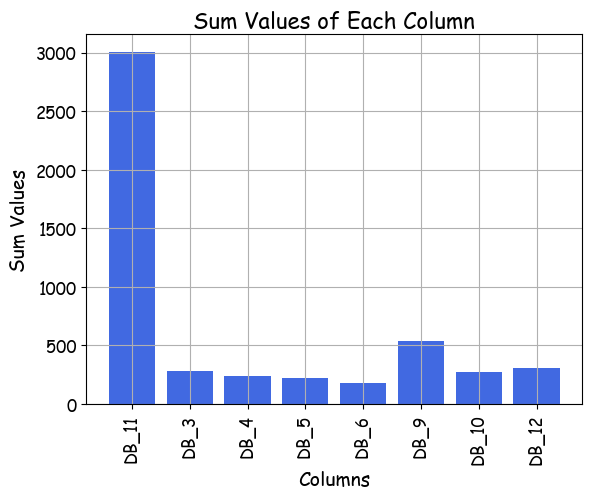

In [175]:
visualize.Visualizer(bender_winter_week_demand, viz_type=viz_types.BarPlot()).plot_plt()

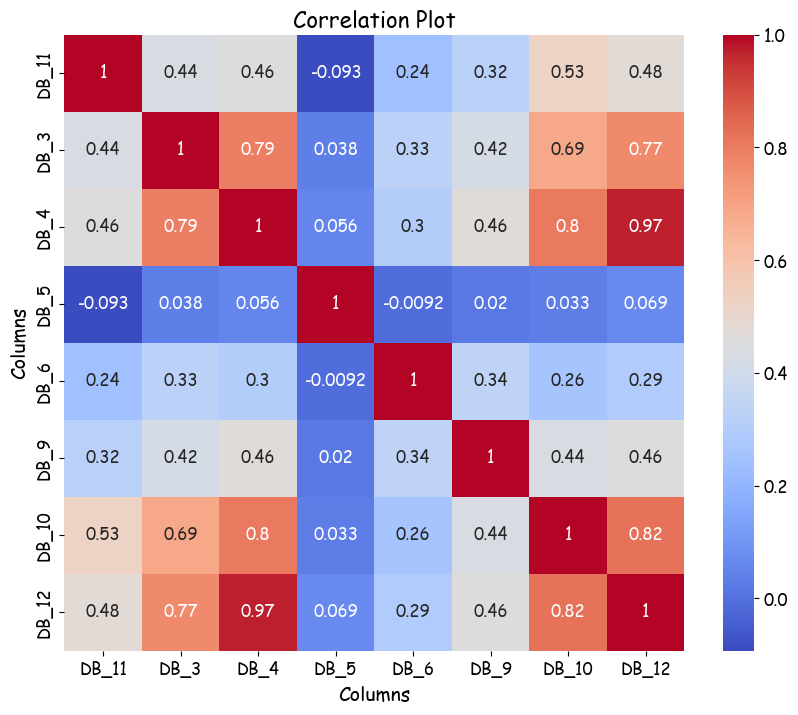

In [176]:
visualize.Visualizer(bender_submeters, viz_type=viz_types.CorrelationPlot()).plot_plt()

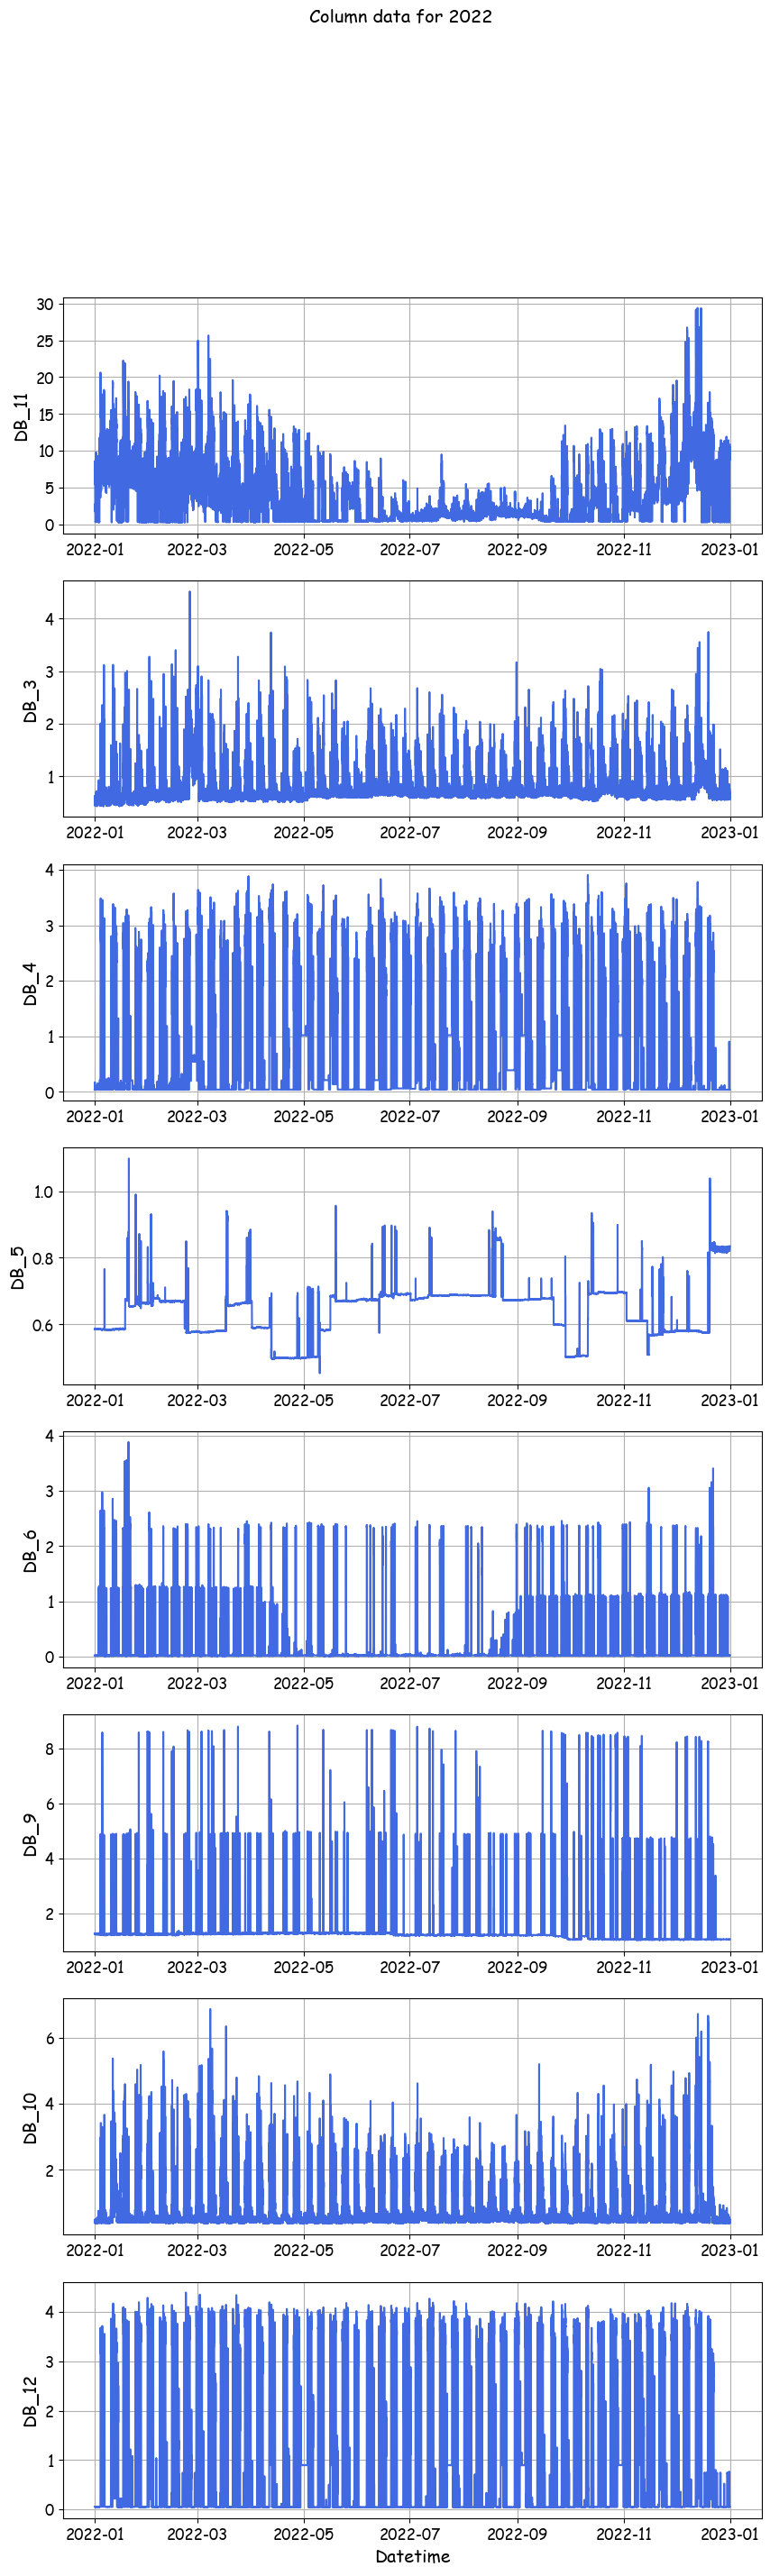

In [177]:
visualize.Visualizer(bender_submeters, viz_type=viz_types.SubplotPlot()).plot_plt()

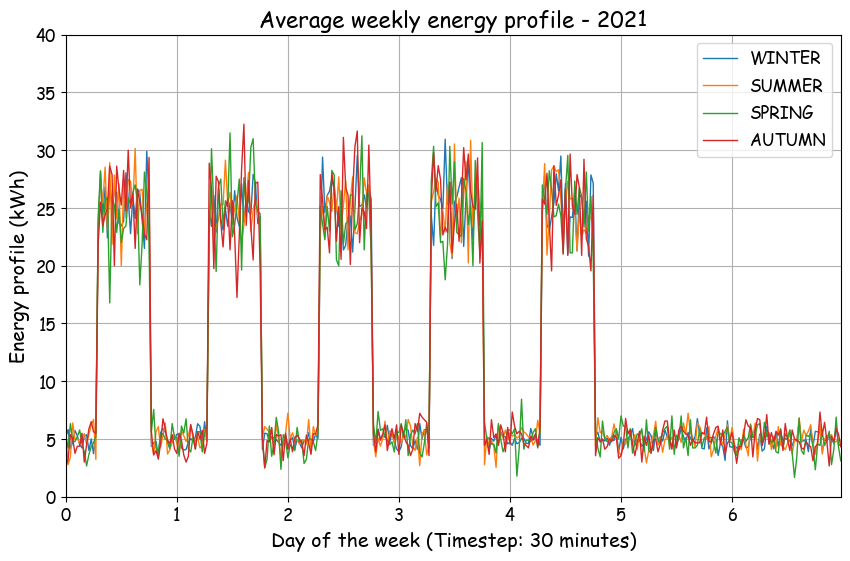

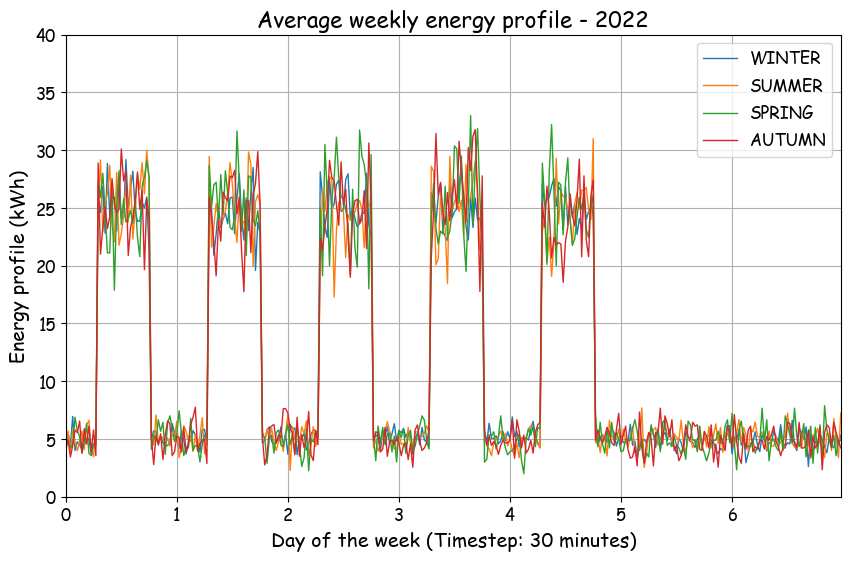

In [178]:
visualize.Visualizer(demand_two, viz_types.AnnualSeasonalWeekPlot()).plot_plt()

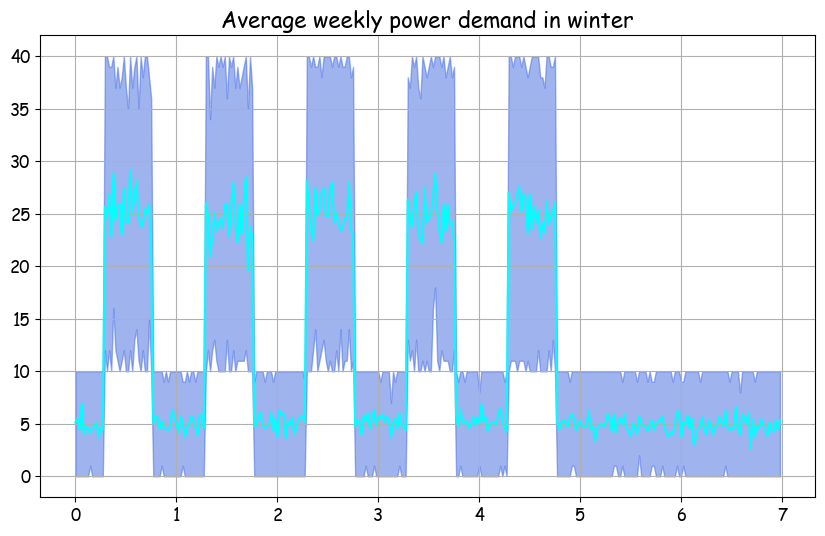

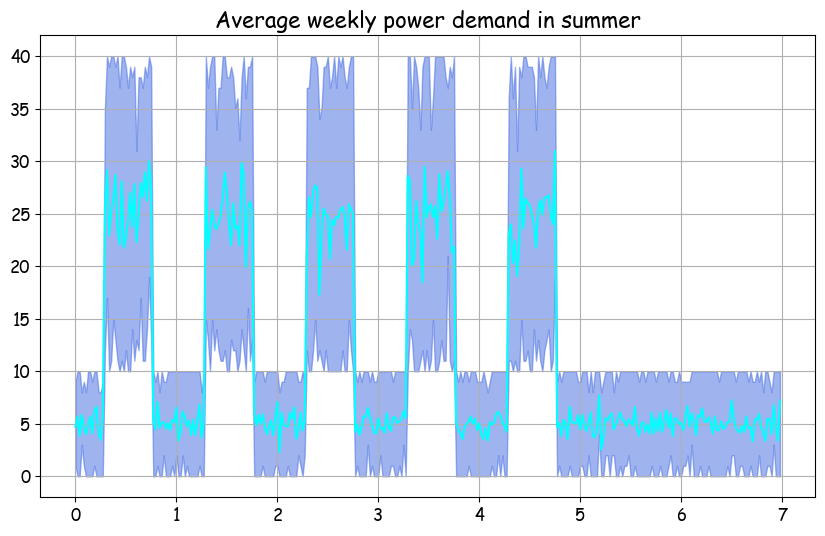

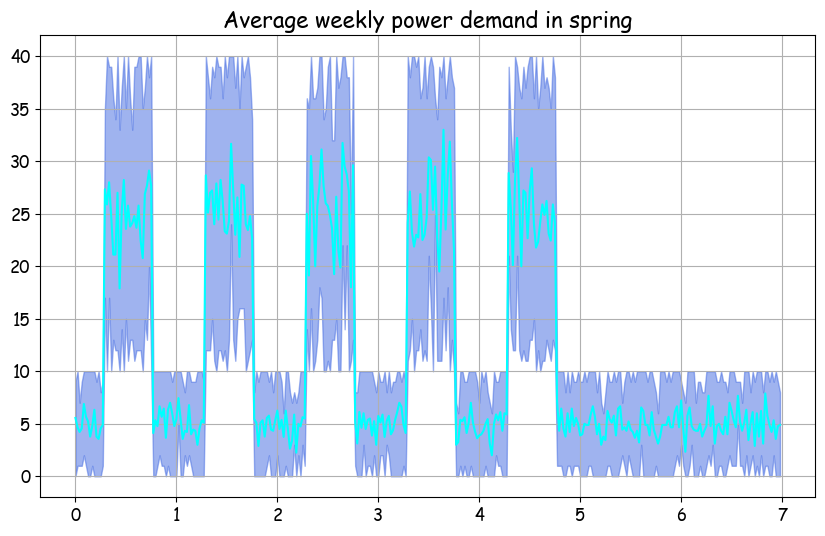

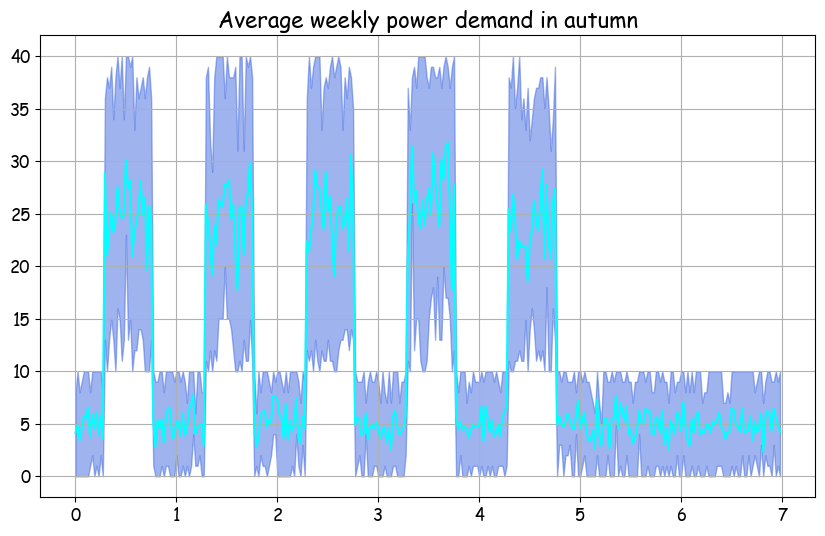

In [179]:
visualize.Visualizer(demand, viz_type=viz_types.AvgSeasonWeekPlot()).plot_plt() 

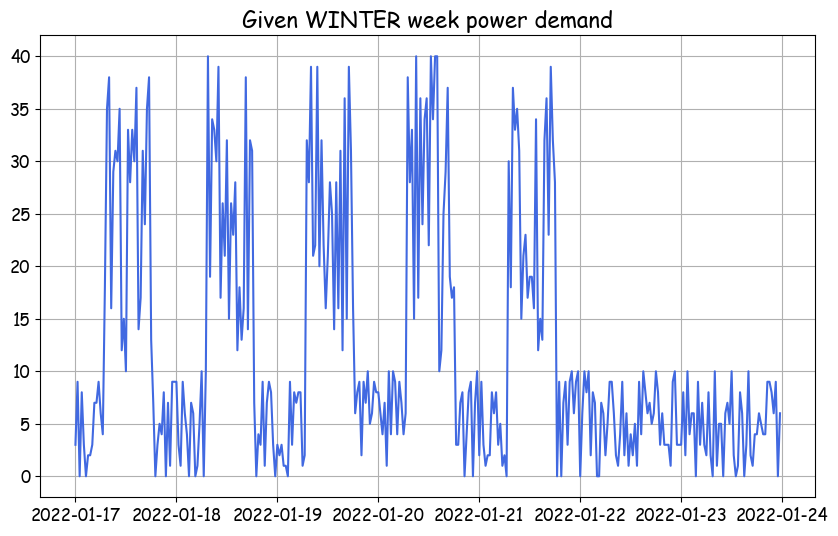

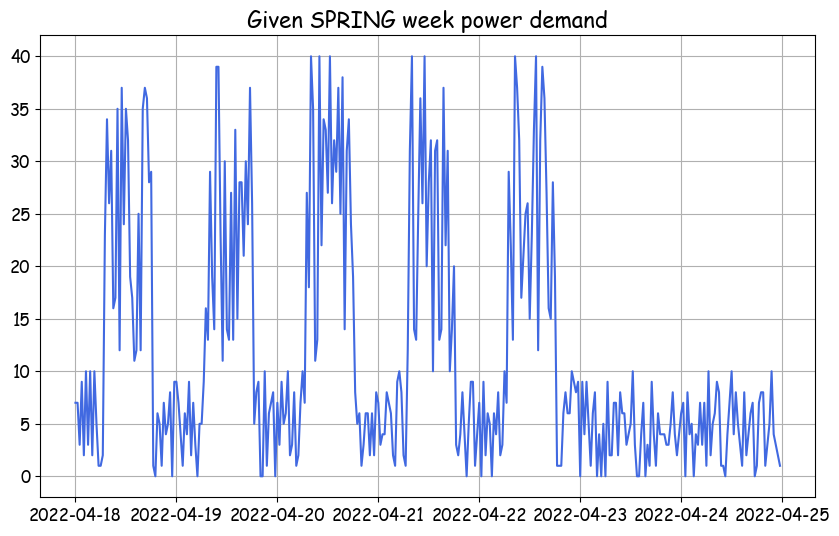

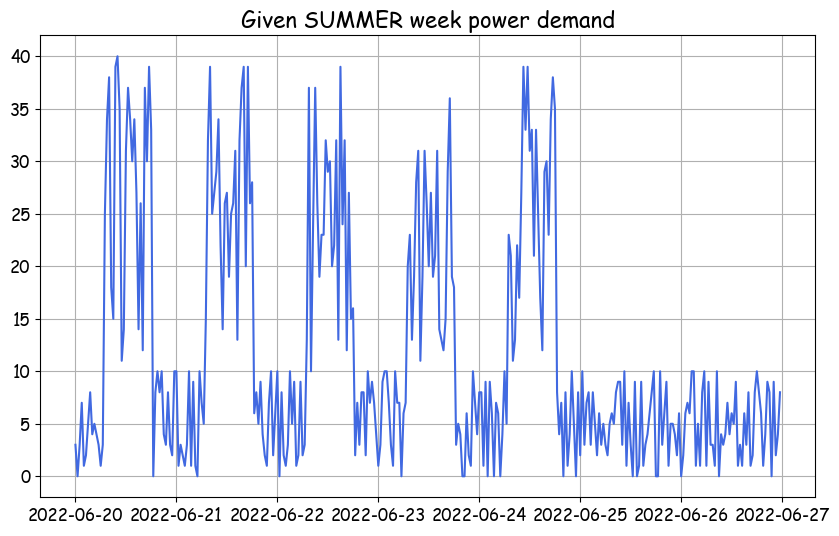

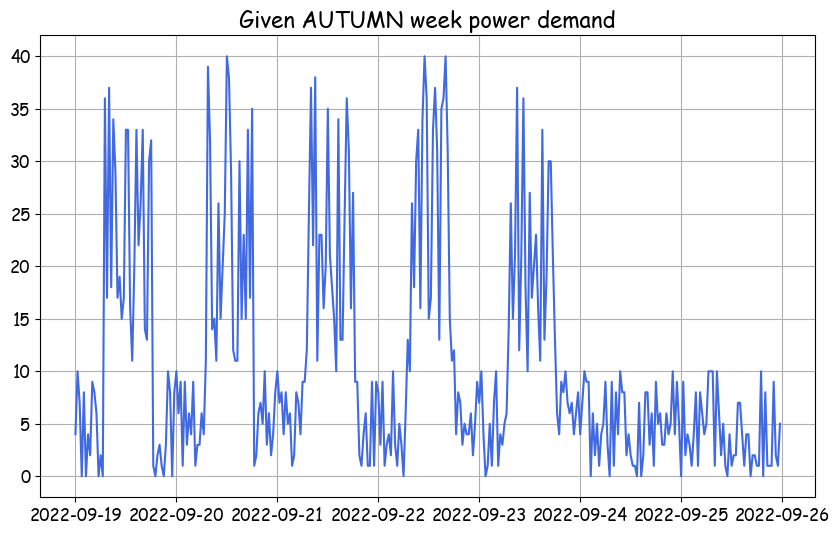

In [180]:
visualize.Visualizer(demand, viz_types.ActualSeasonWeekPlot()).plot_plt()